# Simple linear regression

Created on JupyterLite

See also the R file about this subject

Import packages

In [1]:
#import piplite
#await piplite.install(['pandas'])
#await piplite.install(['matplotlib'])
#await piplite.install(['numpy'])
#await piplite.install(['scikit-learn'])

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

Read the data

In [2]:
df = pd.read_csv("FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Summary of the data: count, mean, standard deviation, minimum, maximum, 25th, 50th and 75th percentiles

In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Plot some features

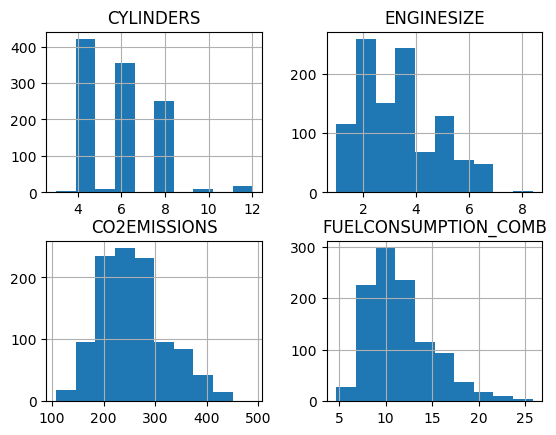

In [4]:
viz = df[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Visually inspect the linear relationship between CO2 emissions and engine size

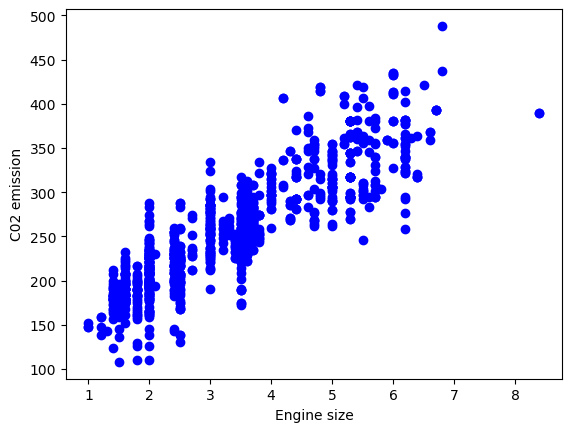

In [5]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("C02 emission")
plt.show()

Select random rows to set apart 80% of the data for training and 20% for testing

In [6]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

Training data

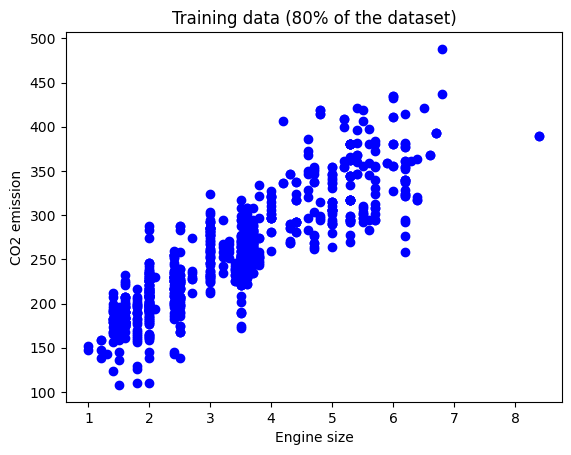

In [7]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("CO2 emission")
plt.title("Training data (80% of the dataset)")
plt.show()

Regression modelling with sklearn

In [8]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# Output the coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.37907404]]
Intercept:  [124.25998867]


Plot the output

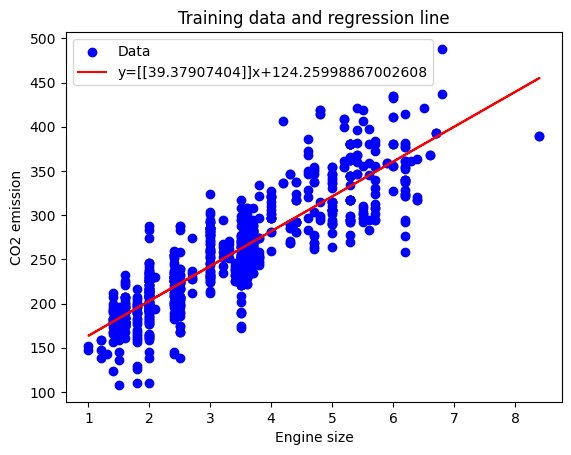

In [9]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("CO2 emission")
plt.title("Training data and regression line")
plt.legend(['Data', 'y={}x+{}'.format(regr.coef_, regr.intercept_[0])])

Compute the accuracy of the regression model. Here, the (A) Mean Absolute Error, (B) Mean Squared Error (MSE), (C) Root Mean Squared Error (RMSE), and (D) the R-squared will be calculated.

In [10]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("Root Mean Squared Error (RMSE): %.2f" % np.sqrt(np.mean((test_y_ - test_y) ** 2)))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 23.13
Residual sum of squares (MSE): 952.17
Root Mean Squared Error (RMSE): 30.86
R2-score: 0.75


# Authors' rights

Machine Learning with Python course by IBM on Coursera: https://www.coursera.org/learn/machine-learning-with-python/

Completed and modified by Mathilde Marie Duville as part of the IBM Artificial Intelligence Engineering Professional Certificate and corresponding IBM badges.
Please, follow the subsequent links to confirm the accreditation: 

https://www.coursera.org/account/accomplishments/professional-cert/KSLW773DAATP?utm_source=link&utm_medium=certificate&utm_content=cert_image&utm_campaign=sharing_cta&utm_product=prof

https://www.credly.com/users/mathilde-marie-duville/badges

------------------------------------------------------------------------------------------------------------------------------------------------------

Author: Saeed Aghabozorgi

Other Contributors: Joseph Santarcangelo, Azim Hirjani

Change Log

Date (YYYY-MM-DD)	Version	Changed By	Change Description

2020-11-03	2.1	Lakshmi Holla	Changed URL of the csv

2020-08-27	2.0	Lavanya	Moved lab to course repo in GitLab

© IBM Corporation 2020. All rights reserved. 